<a href="https://colab.research.google.com/github/PPM5658/AI_app/blob/main/Multi-object-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s eta 0:00:00


In [10]:
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow

In [5]:
print("Loading YOLOv8 model...")
model = YOLO('yolov8n.pt')
print("Model loaded successfully.")

Loading YOLOv8 model...
Model loaded successfully.


In [7]:
image_path = '/content/drive/MyDrive/Object tracking/Gemini_Generated_Image_6ewnwr6ewnwr6ewn.png'
try:
    frame = cv2.imread(image_path)
    if frame is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")
    print("Image loaded successfully.")
except Exception as e:
    print(e)

Image loaded successfully.


In [8]:
print("Running object detection...")
results = model(frame,conf=0.5,imgsz=1440)
print("Detection complete.")

Running object detection...

0: 1440x1440 1 dog, 4 cups, 1 bowl, 5 potted plants, 1 tv, 1 laptop, 1 mouse, 1 keyboard, 1 book, 2 clocks, 27.7ms
Speed: 22.9ms preprocess, 27.7ms inference, 290.3ms postprocess per image at shape (1, 3, 1440, 1440)
Detection complete.


Displaying results...


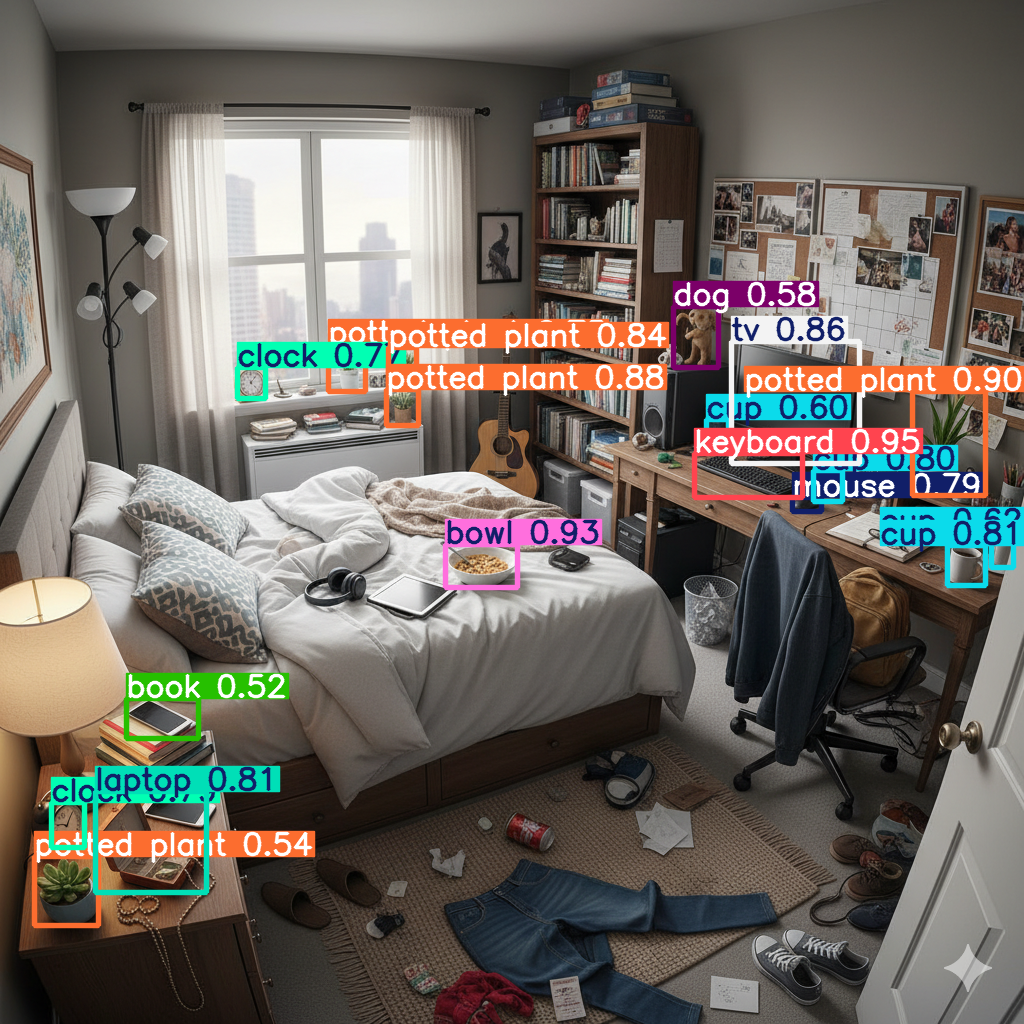

In [9]:
annotated_frame = results[0].plot()

print("Displaying results...")
cv2_imshow(annotated_frame)

Class names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone'

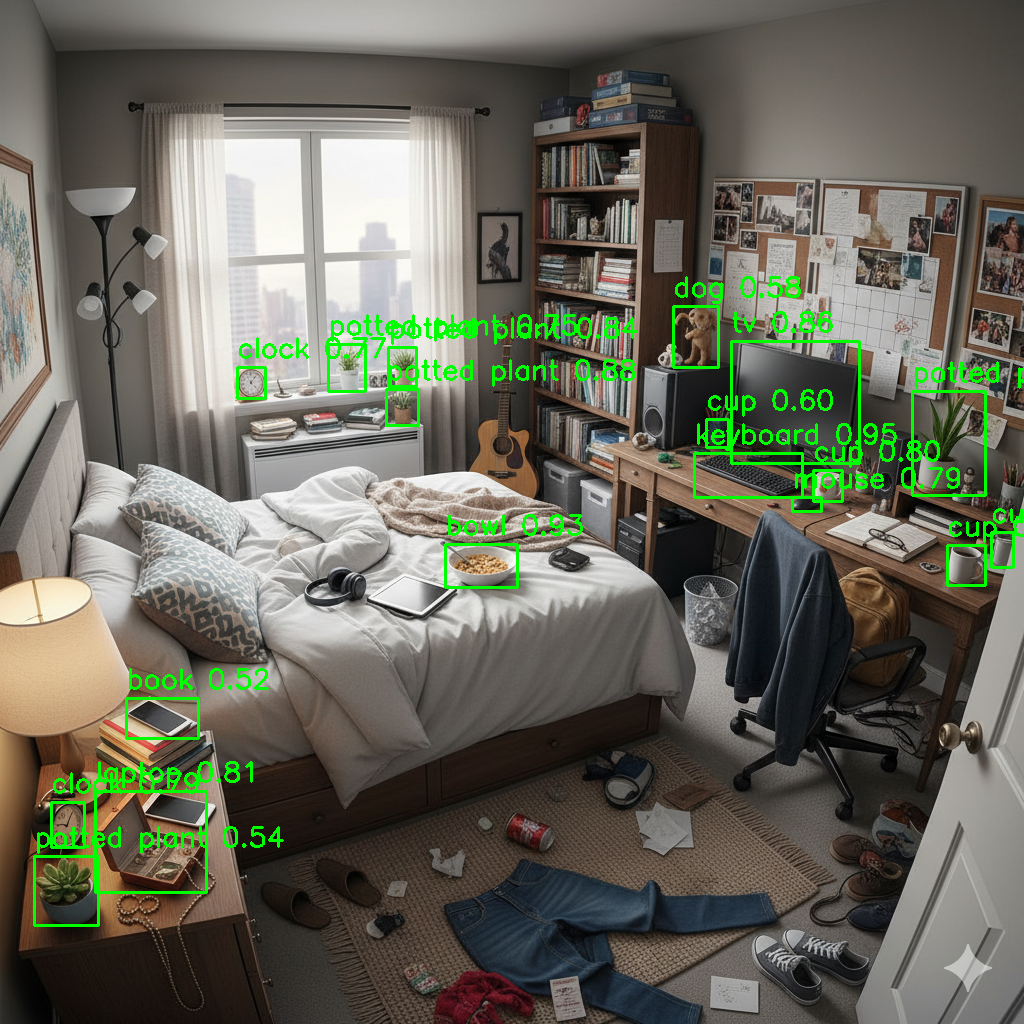

In [11]:
class_names = results[0].names
print(f"Class names: {class_names}\n")

print(f"Found {len(results[0].boxes)} objects in the image.")

for box in results[0].boxes:
    coords = box.xyxy[0].cpu().numpy().astype(int)
    x1, y1, x2, y2 = coords


    confidence = box.conf[0].cpu().numpy()

    class_id = int(box.cls[0].cpu().numpy())
    class_name = class_names[class_id]

    print(f"Object: {class_name} (ID: {class_id})")
    print(f"  - Confidence: {confidence:.2f}")
    print(f"  - Bounding Box: [x1:{x1}, y1:{y1}, x2:{x2}, y2:{y2}]")
    print("---")

    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(frame, f"{class_name} {confidence:.2f}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

cv2_imshow(frame)

In [ ]:
video_path_in="/content/drive/MyDrive/Object tracking/20251013_102120.mp4"
cap = cv2.VideoCapture(video_path_in)
if not cap.isOpened():
    print(f"Error: Could not open video file at {video_path_in}")

w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

print("Processing video frame by frame...")
frame_count = 0
while cap.isOpened():

    success, frame = cap.read()

    if not success:

        print("End of video reached.")
        break

    results = model(frame, conf=0.5)
    annotated_frame = results[0].plot()

    frame_count += 1

    if frame_count % 30 == 0:
        print(f"Processed {frame_count} frames.")
cv2_imshow(annotated_frame)

print("Releasing video resources...")
cap.release()

cv2.destroyAllWindows()

# Phase 2

In [1]:
!pip install timm

In [24]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [15]:
print('Loading Model Midas')
model_type="MiDaS_small"
midas=torch.hub.load('intel-isl/MiDaS',model_type)

device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()
print('Model loaded successfully', device)

Loading Model Midas


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip


/usr/local/lib/python3.12/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


Loading weights:  None


/usr/local/lib/python3.12/dist-packages/torch/hub.py:330: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(


Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_lite3-b733e338.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_lite3-b733e338.pth
Downloading: "https://github.com/isl-org/MiDaS/releases/download/v2_1/midas_v21_small_256.pt" to /root/.cache/torch/hub/checkpoints/midas_v21_small_256.pt


100%|██████████| 81.8M/81.8M [00:02<00:00, 41.1MB/s]


Model loaded successfully cuda


In [19]:
# Load transforms
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

# Select transform based on model type
if model_type == "MiDaS_small":
    transform = midas_transforms.small_transform
else:
    transform = midas_transforms.dpt_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [21]:
frame=cv2.imread(image_path)
RGB=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
input_batch=transform(RGB).to(device)

In [22]:
print("Running inference...")
with torch.no_grad():
    prediction=midas(input_batch)

    prediction=torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=frame.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()
depth_map=prediction.cpu().numpy()
print("Depth map generated successfully.")

Running inference...
Depth map generated successfully.


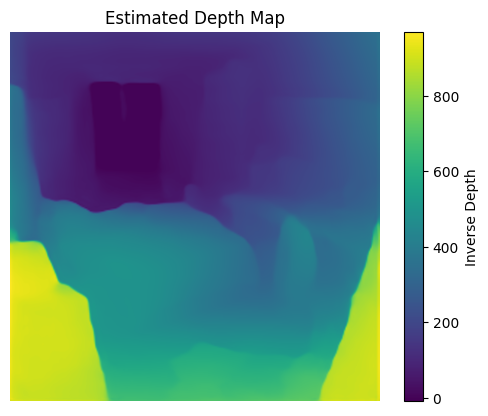

In [23]:
plt.imshow(depth_map, cmap='viridis')
plt.colorbar(label='Inverse Depth') # Add a color bar to show the scale
plt.title('Estimated Depth Map')
plt.axis('off')
plt.show()

Displaying the final fused result...


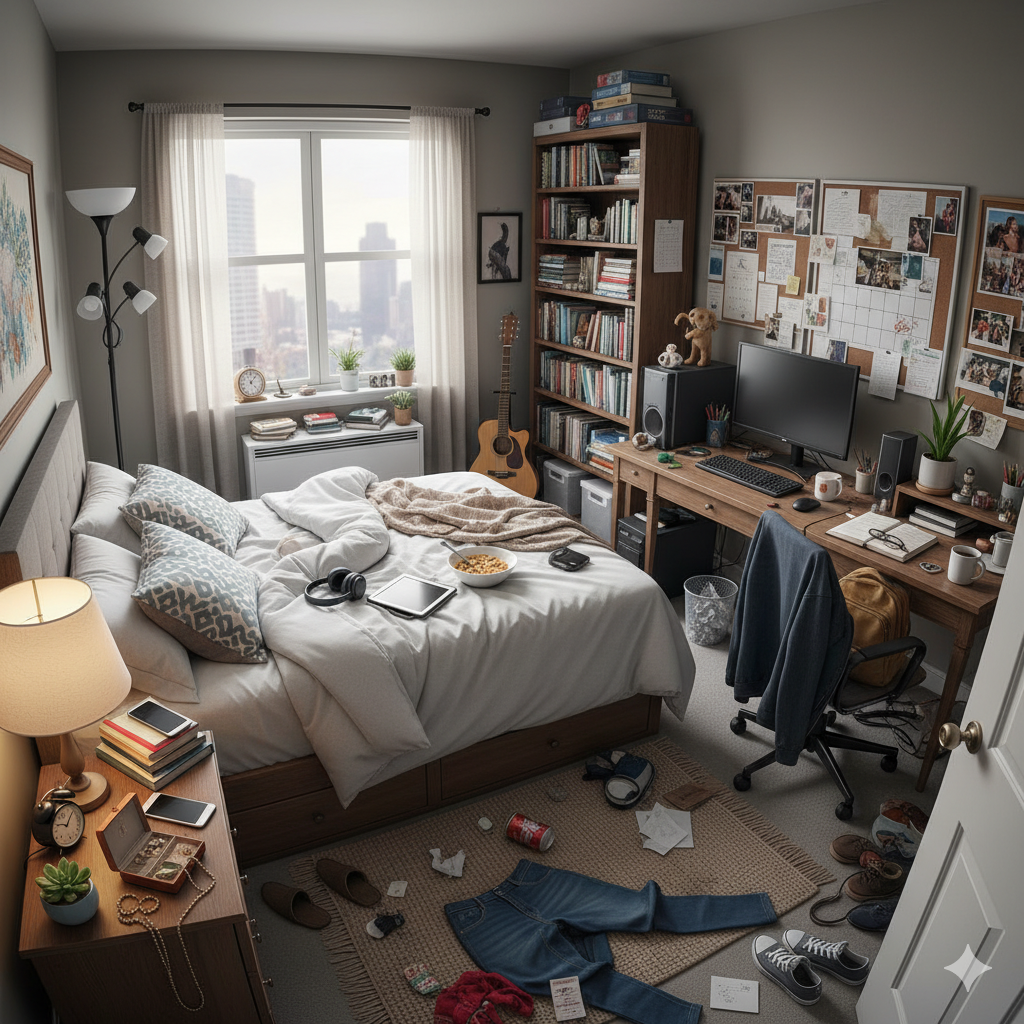

In [26]:
for box in results[0].boxes:
    coords = box.xyxy[0].cpu().numpy().astype(int)
    x1, y1, x2, y2 = coords
    center_x=int((x1+x2)/2)
    center_y=int((y1+y2)/2)
    center_y_clamped=np.clip(center_y,0,depth_map.shape[0]-1)
    center_x_clamped=np.clip(center_x,0,depth_map.shape[1]-1)
    depth_value=depth_map[center_y_clamped,center_x_clamped]
    class_id=int(box.cls[0].cpu().numpy())
    class_name=model.names[class_id]
    confidence = box.conf[0].cpu().numpy()

    # Draw the bounding box
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
    label=f'{class_name} {confidence:.2f} | depth:{depth_map:.2f}'
    cv2.putText(frame,label,(x1,y1-10),cv2.FONT_HERSHEY_SIMPLEX,0.9,(0,255,0),2)
print("Displaying the final fused result...")
cv2_imshow(frame)